<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_dl.png" alt="Drawing" style="width:1700px;">

# <center> 10. CNN FUNDAMENTALS! </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

## <span style="color:red"> Outline </span>
1. **Dealing with images and convolution**
2. **CNN: Introduction of Convolutional neuronal networks**
3. **CNN: Visualizing activations**
4. **CNN: Initialization, dropout and other tricks**



In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Machine_Learning_Course/')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ia2


In [ ]:
#@title Load libraries { display-mode: "form" }
#@markdown Here is important to change to GPU

import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

2.7.0


# **1. Dealing with images and convolution**


**Images are matrices** of, namely, three channels. Each **value** of matrix is a **pixel** and  represents a color value w.r.t **intensities**, namely, between [0-255] = $2^8$. In color, each matrix reprent the quantity of color at each channel.
- **Objects in world are a set of pixels in images. Did you see the complexity of the problem?**



<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl_1.png" width="400">





# CIFAR 10

The CIFAR ( Canadian Institute For Advanced Research )-10 is used for small photo classification problem on computer vision + Machine learning (specially deep learning). The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes.


```
[0: airplane, 1: automobile, 2: bird,
3: cat, 4: deer, 5: dog, 6: frog,
7: horse, 8: ship, 9: truck]
```
**Go to the action!**

Load CIFAR10


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print ("CIFAR 10")
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170508288/170498071 [==============================] - 2s 0us/step
CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


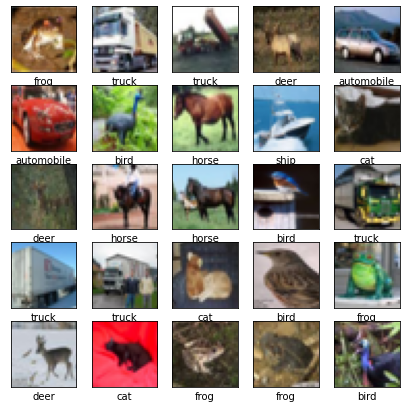

In [ ]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32,3), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

ValueError: ignored

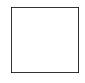

In [ ]:
class_names = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
#@title **code** organize data
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000 y_train: (50000, 10)
Number of images in x_test 10000 y_test:  (10000, 10)


In [ ]:
x_train_flatten = x_train.reshape(50000,32*32*3)
x_train_flatten.shape[1]

3072

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Define a DNN architecture for CIFAR-10
- Use almost three layers
- Evaluate the performance of the approach


In [ ]:
#@title **code student** Built DNN and summarize architecture
model = tf.keras.Sequential([
  tf.keras.layers.Dense(2**9, activation='relu', input_shape=[x_train_flatten.shape[1]]),
  tf.keras.layers.Dense(2**8, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               1573376   
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 10)                2570      
                                                                 
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#@title **code student**. Compile and test the model
optimizer = tf.keras.optimizers.Adam()

  #Select the loss function (MSE)
model.compile(loss='binary_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy'])

In [ ]:
iterations = 20
history = model.fit(x_train_flatten, y_train, epochs=iterations,  validation_split = 0.2)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2839 - accuracy: 0.3219 - val_loss: 0.2744 - val_accuracy: 0.3450
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2566 - accuracy: 0.3981 - val_loss: 0.2552 - val_accuracy: 0.3936
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2452 - accuracy: 0.4250 - val_loss: 0.2444 - val_accuracy: 0.4331
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2375 - accuracy: 0.4458 - val_loss: 0.2414 - val_accuracy: 0.4378
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2309 - accuracy: 0.4646 - val_loss: 0.2371 - val_accuracy: 0.4521
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2267 - accuracy: 0.4760 - val_loss: 0.2323 - val_accuracy: 0.4612
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2224 - accuracy: 0.4871 - val_loss: 0.2386 - val_accuracy:

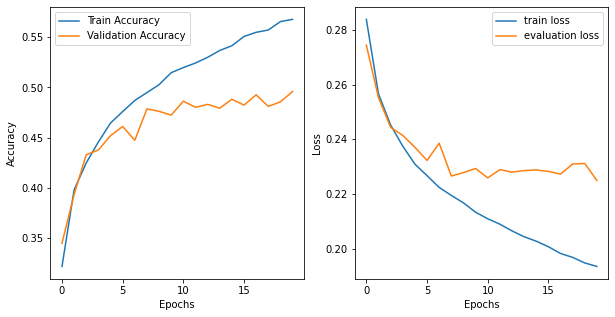

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
#history = model.fit(x_train, y_train, epochs=10,verbose=0, batch_size=64,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

valor predicho: 8  clase:  ship
max prob:  0.35738203 ground truth:  bird
(10000, 10)


<Figure size 432x288 with 0 Axes>

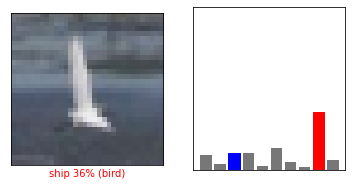

In [ ]:
#@title **code:** What happened? Why so bad?
%run code/dl_plot.py
index_vector =  7000#@param {type:"integer"}

predictions = model.predict(x_test)
print ("valor predicho:",  np.argmax(predictions[index_vector]), " clase: ", class_names[np.argmax(predictions[index_vector])])
print ("max prob: ", np.max(predictions[index_vector]), "ground truth: ", class_names[np.argmax(y_test ,axis=1)[index_vector]])

print(predictions.shape)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index_vector, predictions, np.argmax(y_test ,axis=1), x_test)
plt.subplot(1,2,2)
plot_value_array(index_vector, predictions,  np.argmax(y_test ,axis=1))


#### **Dealing with image variations**
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/dl_2.png" width="700">

Now, Did you see the visual representation complexity?. If not, you can take a [look here](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/complement_notes/VisualRepresentationComplexity.ipynb)

- what were the problems? Which are the limitations?
- We can use prior knowledge  from images?. For isntance, local properties?

# **2. CNN: Introduction of Convolutional neuronal networks**

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN.png">  

The Convolutional neuronal net architectures are able to successfully capture the Spatial dependencies of the images, through the learning of most descriptive filters.

### **Convolutions: the new neuron units to learn**

The convolution is a **fundamental** operation to compute **visual features**.  For instance, a **KERNEL** mask with size $3 \times 3$ is sliding around the image. At each position, each corresponding pixel is multiplied by corresponding value in **kernel**  and finally the values are sum up  to obtain a new estimated value.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/Convolution_schematic.gif" style="width:200px">

For images (signals in 2D), the convolution operation could be defined as:

$$I(x,y) = \sum_{u=0}^{n} \sum_{v=0}^{m} I(x,y)h(u-x, v-y)$$,
$$\hat{I}(x,y) = I(x,y)*h(x,y)$$


In typical, images with three channels, the convolution works, as:
<img width="500" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-3.gif">

Depending of **KERNEL**, there is produced different **features**, such as edges, color filters, smoothing, among much others. The problem es is then:

- Which are the **BEST** kernels to represent any image classes ?
- The analytical answer is so complicated (may be impossible), so, we can **LEARN THe KERNELS**
- So, we can see the kernel as a **local neuron unit** and we can reformulte the problem to fix best weights  of convolution kernel!.

From this approximation, we have new kind of deep learning architectures that nowadays represent the state-of-the-art in image representation and other related areas!...

Some additional concepts to consider to reduce complexity:


- **Stride length**: The Kernel shifts every time to perform operation between Kernel and the portion of the image.

- **Padding:** The process to add *artifitial* columns or rows to obtain same image input dimensions.
    - same padding: add rows and colums to obtain in response the same image dimension
    - valid padding: Not use any padding.




### **Main Convolutional (Conv) Layers**

Then, if **neuron units** are **convolutions**, the **Layers** are basically a set of **learned kernels**, that hiearchically achieve a **very robust representations**. Nowadays, a CNN architecture is then form by these main layers:

#### **Convolutional Layers**

A set of convolutional kernels (filters) to turn input images into output images (responses). For instance, using **valid padding** and 8 filters, we obtain:
<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-7.png">

#### **Pooling Layers**

These layers are speciallized on reduce spatial size of CNN features, allowing  decrease the computational time and  extracting **dominant features** which are rotational and positional invariant. Also allows as a Noise Suppressant

There are two types of pooling: **Max-Pooling**, **Average pooling**.
<img width="200px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-4.jpeg">  

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-8.png">



#### **Fully-Connected layer**

At the end of CNN architectures, we namely use DNNs, that allows to learn non-linear combinations of the high-level features and robustly represent the descriptor for any input.

<img width="400px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-9.png">  


Now, we have the complete recipe:

<img width="500px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN.png">  

and **we can go to the action!**




In [ ]:
#@title **code** pay attention on the computational complexity
model_CNN =  tf.keras.models.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_CNN.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
model_CNN.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               1048704   
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                      

In [ ]:
#@title **code** same notation to compile model
opt = tf.keras.optimizers.Adam()
model_CNN.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
391/391 [==============================] - 9s 21ms/step - loss: 1.5144 - accuracy: 0.4582 - val_loss: 1.2695 - val_accuracy: 0.5495
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 1.1250 - accuracy: 0.6057 - val_loss: 1.0902 - val_accuracy: 0.6173
Epoch 3/10
391/391 [==============================] - 8s 20ms/step - loss: 0.9845 - accuracy: 0.6567 - val_loss: 1.0008 - val_accuracy: 0.6492
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 0.8912 - accuracy: 0.6900 - val_loss: 0.9800 - val_accuracy: 0.6624
Epoch 5/10
391/391 [==============================] - 8s 20ms/step - loss: 0.8125 - accuracy: 0.7184 - val_loss: 0.9655 - val_accuracy: 0.6675
Epoch 6/10
391/391 [==============================] - 8s 21ms/step - loss: 0.7502 - accuracy: 0.7394 - val_loss: 0.9633 - val_accuracy: 0.6700
Epoch 7/10
391/391 [==============================] - 8s 21ms/step - loss: 0.6922 - accuracy: 0.7612 - val_loss: 0.9641 - val_accuracy: 0.6781

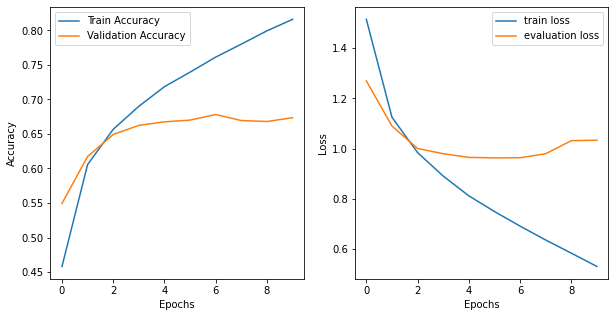

In [ ]:
#@title **code**. To show prediction for a specific image
import matplotlib.pyplot as plt
history = model_CNN.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

**Pay attention in which layer there is most parameters to learn.**

Now, you can propose a new CNN architectures. Use additional convolution and pooling layers.

- You can also change the optimizer.
- You can also change epochs, batch size
- pfff...so may parameters to learn...
- Report yout results.


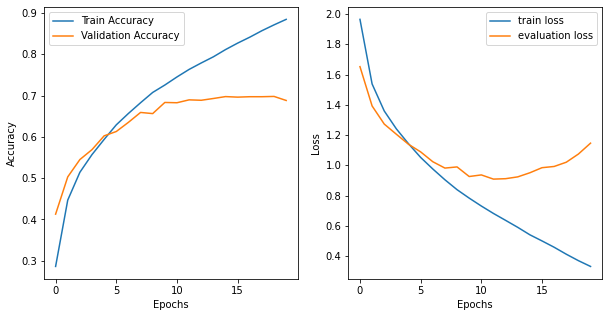

In [ ]:
#@title **code student**






import matplotlib.pyplot as plt
history = model_CNN.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

#**3. CNN: Visualizing activations**

CNN architectures are not only important because results, they efficient, robust, hierarchical and descriptive visual models!. In fact:

- The  first ConvLayer captures the Low-Level features such as edges, color. Learn **BEST FEATURES** for a particular problem
- Then,  the next convlayer learn high-level features of these primitives
    
- From biology, is analogous to connectivity pattern of Neurons in the Human Brain. **Emulate visual cortex!**, only respond in a restricted region of visual field.
- The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

- Performs a better fitting learning due to the reduction in the number of parameters.
    - For instace. For an image in DNN $(224 \times 224 \times 3) =105.528$ input features
    - an hidden layer of 1024 (very small respect to the input) is $(105.528 \times 1024)$ that gives **150 millons of parameters!**... imposible to train!
- Are invariant to spatial position of the objects. If an object is in different position of an image the DNN react very different.  

#### We learn  features from low to high level !!

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/CNN-10.png">

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/DF_1.png">


Using **Tensorflow** we can visualize such activations, that represent the output of convolutions.

In [ ]:
#@title **code**  rear layer outputs
layer_outputs = [layer.output for layer in model_CNN.layers ]
layer_outputs

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_16')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_17')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 8192) dtype=float32 (created by layer 'flatten_8')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_16')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_17')>]

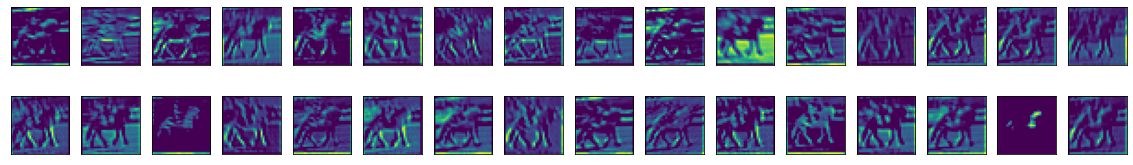

In [ ]:
#@title **code** Visualize first layer
activation_model = tf.keras.models.Model(inputs=model_CNN.input, outputs=layer_outputs)
array = np.expand_dims(x_test[5000], axis=0)
activations = activation_model.predict(array)
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[0][0,:, :, i], cmap='viridis')

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, visualize second layer activations.

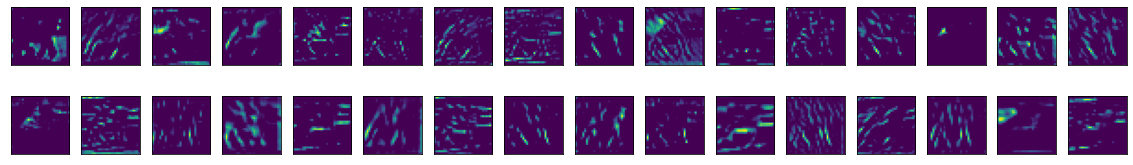

In [ ]:
#@title **code student** visualize N layers
plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(activations[2][0,:, :, i], cmap='viridis')

#**4. CNN: Initialization, dropout and other tricks**

There exist additional factors that could be implemented over CNN and in general over deep lerning approaches to achieve much better representations.


### **Initialization of weights to be learned**

A dramatical parameter to properly converge or almost to obtain a faster covergence it is the initializaciont of parameters.  There exist many ways to initialize weights, that range from classical  distributions to more sophisticated methods. The most common are:

- **Random normal** : uses a normal distribution for weights at each layer
- **Random uniform**: uses a unifrom distribution for weights at each layer
- **Truncated Normal** same than normal but values out of two standar deviation are discarded

- **Lecun Uniform** it is like a uniform distribution but stablish a range `[-lim, lim]` with $lim = \sqrt{(\frac{3}{\text{# input units}})}$



- **Glorot normal** or Xavier initialization use a truncated normal version, but with a standard deviation defition such as:

$$ sigma = \sqrt{\frac{2}{\text{# input units} -  \text{# output units}}}$$

This glorot initialization it is used by default in keras  at each of the layers.

**Lets go to try with some initialization**


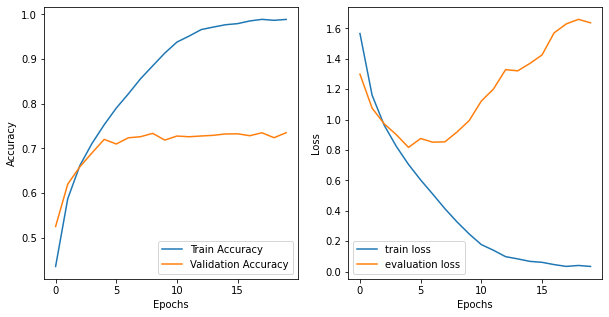

In [ ]:
#@title **code** using random initialization
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Flatten())
model_in.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

1. What it is `he uniform `?
2. Test with other configuration to init layers and report results.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


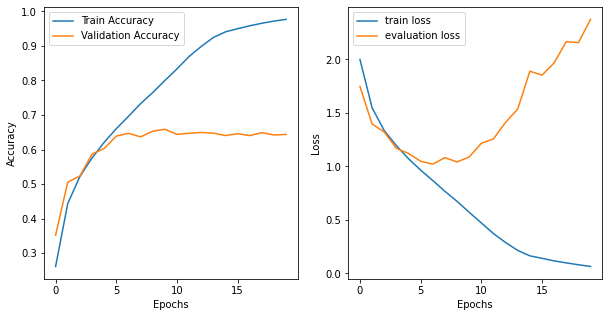

In [ ]:
#@title **code student**
#@title **code** using random initialization
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same', input_shape=(32, 32, 3)))
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same'))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='truncated_normal', bias_initializer='truncated_normal', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Flatten())
model_in.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='truncated_normal',  activation='relu'))
model_in.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');





/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


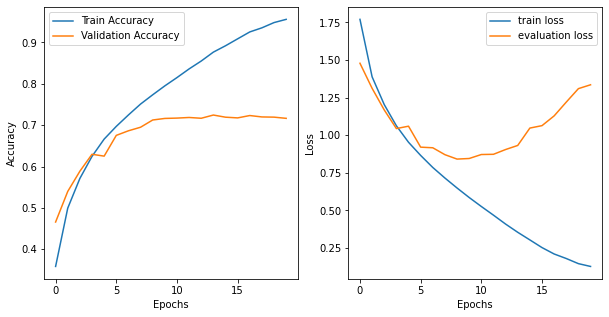

In [ ]:
model_in = tf.keras.models.Sequential()
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same', input_shape=(32, 32, 3)))
model_in.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in.add(tf.keras.layers.Flatten())
model_in.add(tf.keras.layers.Dense(128, kernel_initializer='truncated_normal', bias_initializer='truncated_normal',  activation='relu'))
model_in.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');





### **Dropout to avoid overfitting**

This technique randomly drop nodes out of the network with a consecuent regularizing effect, avoiding overfitting problems

- some number of layer outputs are randomly ignored or “dropped out"
- In Keras this effect is achieved by introducing a dropout layer
- the amount of nodes removed is specified as a parameter.
- In this example it is add Dropout layers after each max pooling layer

**Lets go to try**

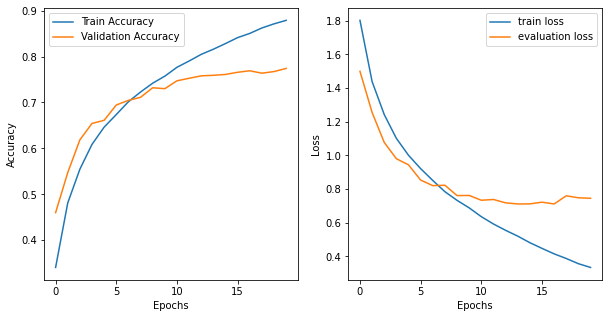

In [ ]:
#@title **code** CNN with dropout
model_in_do = tf.keras.models.Sequential()
model_in_do.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Flatten())
model_in_do.add(tf.keras.layers.Dense(128, kernel_initializer='glorot_uniform', bias_initializer='he_uniform',  activation='relu'))
model_in_do.add(tf.keras.layers.Dropout(0.2))
model_in_do.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in_do.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in_do.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Batch normalization**

An additional process to normalize the activation outputs. This normalization acts as standar normalization by keeping mean activation close to **ZERO** and standar deviation close to **ONE**. This relative simple process allows to acelerate training network and reduce the overfitting [1].  

**Lets go to try**

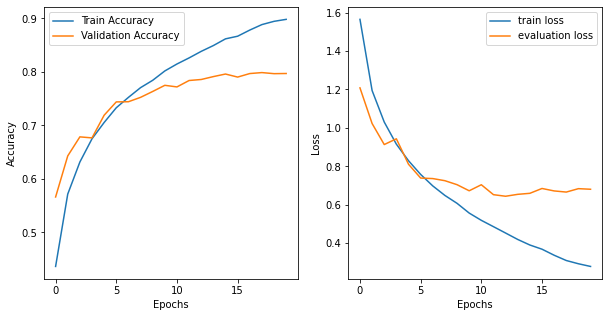

In [ ]:
#@title **code** CNN with Batch normalization
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Flatten())
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='truncated_normal', bias_initializer='truncated_normal',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dropout(0.2))
model_in_do_ba.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in_do_ba.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in_do_ba.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now try to use batch normalization without use dropout. **ONLY** use batch normalization and report the results
- Use batch normalization for some layers, justify which layer did you selected
- Finally, built a CNN that report your best results and visualize the predictions

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


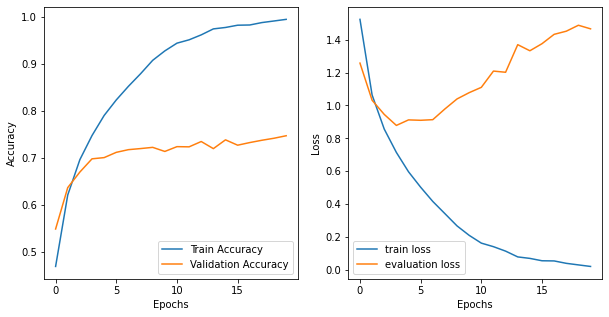

In [ ]:
#@title **code student**

#@title **code** CNN with Batch normalization
model_in_do_ba = tf.keras.models.Sequential()
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same', input_shape=(32, 32, 3)))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='lecun_uniform', bias_initializer='lecun_uniform', padding='same'))
model_in_do_ba.add(tf.keras.layers.BatchNormalization())
model_in_do_ba.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_in_do_ba.add(tf.keras.layers.Flatten())
model_in_do_ba.add(tf.keras.layers.Dense(128, kernel_initializer='truncated_normal', bias_initializer='truncated_normal',  activation='relu'))
model_in_do_ba.add(tf.keras.layers.Dense(10, activation='softmax'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model_in_do_ba.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

import matplotlib.pyplot as plt
history = model_in_do_ba.fit(x_train, y_train, epochs=20,verbose=0, batch_size=32,validation_data=(x_test, y_test))
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');


In [ ]:
#@title **code:** evaluate the model
model_in_do_ba.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4665 - accuracy: 0.7466


[1.4665273427963257, 0.7465999722480774]

ERROR:root:File `'code/dl_plot.py'` not found.


NameError: ignored

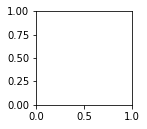

In [ ]:
#@title **code** An overview of the results
%run code/dl_plot.py

predictions = model_in_do_ba.predict(x_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, np.argmax(y_test ,axis=1), x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, np.argmax(y_test ,axis=1))

# References

1. [Batch normalization](https://arxiv.org/pdf/1502.03167.pdf)
2. [Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)
3. [A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)


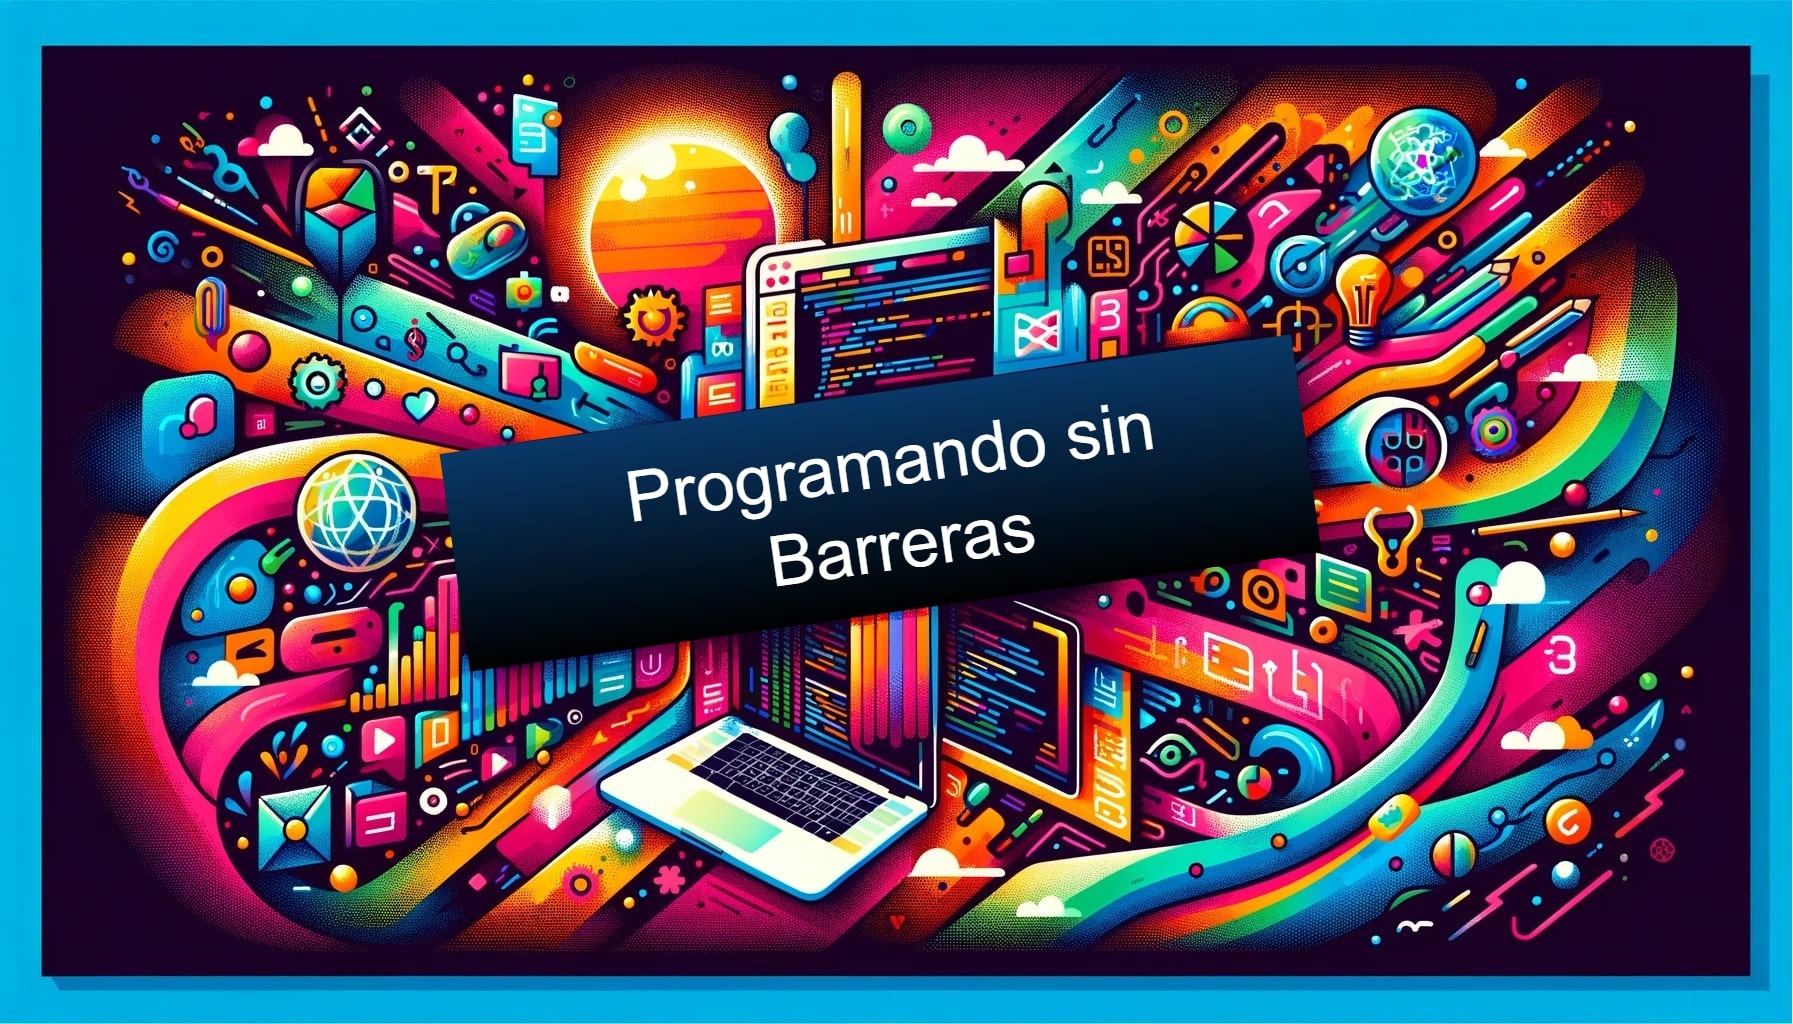